In [1]:
import pandas as pd
import os

In [2]:
# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

In [3]:
# Define the labels/classes
labels = {"E:\LiveProject\Deep_Learning\Satellite Image Classification\data\cloudy" : 'Cloudy',
          "E:\LiveProject\Deep_Learning\Satellite Image Classification\data\desert" : 'Desert',
          "E:\LiveProject\Deep_Learning\Satellite Image Classification\data\green_area" : 'Green_Area',
          "E:\LiveProject\Deep_Learning\Satellite Image Classification\data\water" : 'Water',
           }

In [4]:
# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)

C:\Users\debna\AppData\Local\Temp\ipykernel_14060\2283060518.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\debna\AppData\Local\Temp\ipykernel_14060\2283060518.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\debna\AppData\Local\Temp\ipykernel_14060\2283060518.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
C:\Users\debna\AppData\Local\Temp\ipykernel_14060\2283060518.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pan

In [5]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# Load the dataset
df = pd.read_csv("E:\LiveProject\Deep_Learning\Satellite Image Classification\data\image_dataset.csv")

In [10]:
df. head()

,image_path,label
0,E:\LiveProject\Deep_Learning\Satellite Image C...,Cloudy
1,E:\LiveProject\Deep_Learning\Satellite Image C...,Cloudy
2,E:\LiveProject\Deep_Learning\Satellite Image C...,Cloudy
3,E:\LiveProject\Deep_Learning\Satellite Image C...,Cloudy
4,E:\LiveProject\Deep_Learning\Satellite Image C...,Cloudy


In [11]:
df. shape

(5631, 2)

In [12]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5631 non-null   object
 1   label       5631 non-null   object
dtypes: object(2)
memory usage: 88.1+ KB


In [15]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Pre-process the data

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

Found 4504 validated image filenames belonging to 4 classes.


In [19]:
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 1127 validated image filenames belonging to 4 classes.


# Deep Learning Model

In [20]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)

C:\Users\debna\AppData\Local\Temp\ipykernel_14060\1344171112.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5
141/141 [==============================] - 509s 4s/step - loss: 0.5891 - accuracy: 0.7207 - val_loss: 0.6536 - val_accuracy: 0.6655
Epoch 2/5
141/141 [==============================] - 486s 3s/step - loss: 0.4093 - accuracy: 0.8381 - val_loss: 0.3162 - val_accuracy: 0.8678
Epoch 3/5
141/141 [==============================] - 490s 3s/step - loss: 0.3548 - accuracy: 0.8575 - val_loss: 0.3551 - val_accuracy: 0.8438
Epoch 4/5
141/141 [==============================] - 476s 3s/step - loss: 0.3429 - accuracy: 0.8650 - val_loss: 0.3380 - val_accuracy: 0.8749
Epoch 5/5
141/141 [==============================] - 472s 3s/step - loss: 0.3339 - accuracy: 0.8661 - val_loss: 0.3796 - val_accuracy: 0.8554


In [23]:
num_samples = test_df.shape[0]
num_samples

1127

In [24]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 16s 442ms/step - loss: 0.3796 - accuracy: 0.8554


In [25]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000152D1BE77C0>>

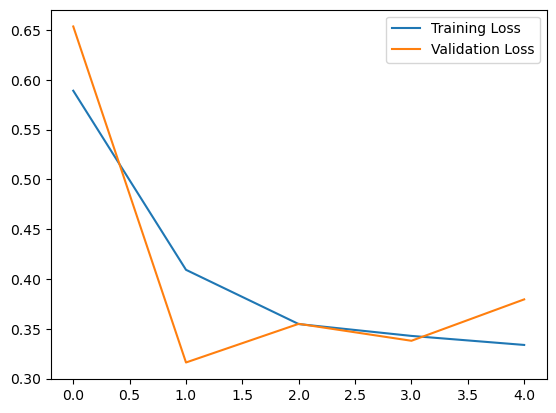

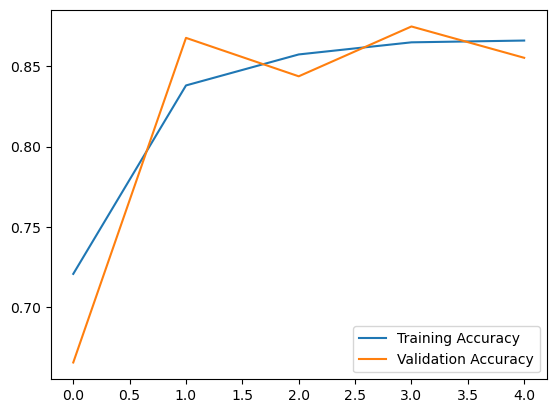

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

In [30]:
# Load the model
model = load_model("Model.h5")

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model
from PIL import Image

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [33]:
# Load an image from the test set
img = load_img("E:\LiveProject\Deep_Learning\Satellite Image Classification\data\green_area\Forest_2.jpg", target_size=(255, 255))

In [34]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[37., 61., 71.],
        [37., 61., 71.],
        [37., 61., 71.],
        ...,
        [40., 69., 75.],
        [40., 69., 75.],
        [40., 69., 75.]],

       [[37., 61., 71.],
        [37., 61., 71.],
        [37., 61., 71.],
        ...,
        [40., 69., 75.],
        [40., 69., 75.],
        [40., 69., 75.]],

       [[37., 61., 71.],
        [37., 61., 71.],
        [37., 61., 71.],
        ...,
        [40., 69., 75.],
        [40., 69., 75.],
        [40., 69., 75.]],

       ...,

       [[42., 66., 78.],
        [42., 66., 78.],
        [42., 66., 78.],
        ...,
        [37., 61., 73.],
        [37., 61., 73.],
        [37., 61., 73.]],

       [[42., 66., 78.],
        [42., 66., 78.],
        [42., 66., 78.],
        ...,
        [37., 61., 73.],
        [37., 61., 73.],
        [37., 61., 73.]],

       [[42., 66., 78.],
        [42., 66., 78.],
        [42., 66., 78.],
        ...,
        [37., 61., 73.],
        [37., 61., 73.],
        [37., 61., 73.]]

In [35]:
img_array.shape

(255, 255, 3)

In [36]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.14509805, 0.23921569, 0.2784314 ],
        [0.14509805, 0.23921569, 0.2784314 ],
        [0.14509805, 0.23921569, 0.2784314 ],
        ...,
        [0.15686275, 0.27058825, 0.29411766],
        [0.15686275, 0.27058825, 0.29411766],
        [0.15686275, 0.27058825, 0.29411766]],

       [[0.14509805, 0.23921569, 0.2784314 ],
        [0.14509805, 0.23921569, 0.2784314 ],
        [0.14509805, 0.23921569, 0.2784314 ],
        ...,
        [0.15686275, 0.27058825, 0.29411766],
        [0.15686275, 0.27058825, 0.29411766],
        [0.15686275, 0.27058825, 0.29411766]],

       [[0.14509805, 0.23921569, 0.2784314 ],
        [0.14509805, 0.23921569, 0.2784314 ],
        [0.14509805, 0.23921569, 0.2784314 ],
        ...,
        [0.15686275, 0.27058825, 0.29411766],
        [0.15686275, 0.27058825, 0.29411766],
        [0.15686275, 0.27058825, 0.29411766]],

       ...,

       [[0.16470589, 0.25882354, 0.30588236],
        [0.16470589, 0.25882354, 0.30588236],
        [0.16470589, 0

In [37]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

# Using Our Model For Predictions

In [38]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 [==============================] - 0s 208ms/step


In [39]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.
